<a href="https://colab.research.google.com/github/komalkesav/MLproject_in_breastcancer/blob/main/FINALProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Project
%pwd

/content/drive/MyDrive/Colab Notebooks/Project


'/content/drive/MyDrive/Colab Notebooks/Project'

In [ ]:
!pip install pydicom --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (Conv2D,
                                     MaxPool2D,
                                     BatchNormalization,
                                     Dense,
                                     Dropout,
                                     GlobalMaxPool2D)
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import glob
from tqdm import tqdm
import pydicom
import pandas as pd

In [ ]:
def load_data(img_height, img_width, folder_path):
  normal_paths = glob.glob(folder_path + '/' + 'normal' + '/' + '*.png')
  cancer_paths = glob.glob(folder_path + '/' + 'cancer' + '/' + '*.png')
  total_images = len(normal_paths)+len(cancer_paths)
  X_train = np.zeros((total_images, img_height, img_width), dtype=np.float32)
  Y_train = np.zeros((total_images, 1))

  for n, path in tqdm(enumerate(normal_paths)):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_height, img_width))
    X_train[n] = image / 255
    Y_train[n] = 0
  for n, path in tqdm(enumerate(cancer_paths)):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (img_height, img_width))
    X_train[n] = image / 255
    Y_train[n] = 1

  Y_train = np.expand_dims(Y_train, axis=-1)
  return X_train, Y_train

(512, 512)


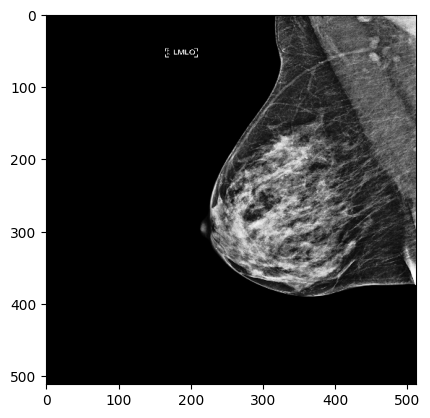

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Project/val/normal/10439_1825831835.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, 'Greys_r')

In [ ]:
X_train, Y_train = load_data(img_height=512, img_width=512, folder_path="train")

634it [00:16, 37.91it/s] 
599it [04:44,  2.10it/s]


In [ ]:
model = Sequential()

model.add(Conv2D(32, 5, padding = 'same', activation ='relu', input_shape = (512, 512, 1)))
model.add(Conv2D(64, 5, padding = 'same',  activation = 'relu'))
model.add(Conv2D(64, 5, padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(128, 5, padding = 'same', activation = 'relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 5, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, 5, padding = 'same', activation = 'relu'))
model.add(GlobalMaxPool2D())
model.add(Dropout(0.3))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(1e-4),
              loss='binary_crossentropy',
              metrics = [tf.keras.metrics.BinaryAccuracy(),
                         tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 512, 512, 32)      832       
                                                                 
 conv2d_10 (Conv2D)          (None, 512, 512, 64)      51264     
                                                                 
 conv2d_11 (Conv2D)          (None, 512, 512, 64)      102464    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 256, 256, 64)      0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 256, 256, 64)      0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 64)      102464    
                                                      

In [ ]:
X_val, Y_val = load_data(512, 512, folder_path='val')

220it [00:05, 43.52it/s] 
213it [01:36,  2.21it/s]


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True, verbose = 1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor = 0.5, patience = 5, verbose = 1)

In [ ]:
history = model.fit(X_train, Y_train,
                    batch_size = 16,
                    epochs = 10,
                    validation_data = (X_val, Y_val),
                    callbacks = [reduce_lr, early_stop])

Epoch 1/10
78/78 [==============================] - 155s 2s/step - loss: 0.4938 - binary_accuracy: 0.9270 - precision_1: 0.8705 - recall_1: 0.9983 - val_loss: 0.3084 - val_binary_accuracy: 0.9838 - val_precision_1: 0.9682 - val_recall_1: 1.0000 - lr: 1.0000e-04
Epoch 2/10
78/78 [==============================] - 150s 2s/step - loss: 0.2056 - binary_accuracy: 0.9667 - precision_1: 0.9457 - recall_1: 0.9883 - val_loss: 0.0846 - val_binary_accuracy: 0.9838 - val_precision_1: 0.9682 - val_recall_1: 1.0000 - lr: 1.0000e-04
Epoch 3/10
78/78 [==============================] - 150s 2s/step - loss: 0.1531 - binary_accuracy: 0.9692 - precision_1: 0.9445 - recall_1: 0.9950 - val_loss: 0.0760 - val_binary_accuracy: 0.9838 - val_precision_1: 0.9682 - val_recall_1: 1.0000 - lr: 1.0000e-04
Epoch 4/10
78/78 [==============================] - 150s 2s/step - loss: 0.1424 - binary_accuracy: 0.9700 - precision_1: 0.9446 - recall_1: 0.9967 - val_loss: 0.0772 - val_binary_accuracy: 0.9838 - val_precision_1:

In [ ]:
# to save entire model
model.save('final_model.keras')

In [ ]:
# to load whole model
model = keras.saving.load_model('final_model.keras')

In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head(4)

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


(1, 512, 512, 1)
1/1 [==============================] - 0s 120ms/step
736471439.dcm prediction: [[0.92698634]]
(1, 512, 512, 1)
1/1 [==============================] - 0s 25ms/step
1591370361.dcm prediction: [[0.9264198]]
(1, 512, 512, 1)
1/1 [==============================] - 0s 31ms/step
68070693.dcm prediction: [[0.9309193]]
(1, 512, 512, 1)
1/1 [==============================] - 0s 18ms/step
361203119.dcm prediction: [[0.9293667]]


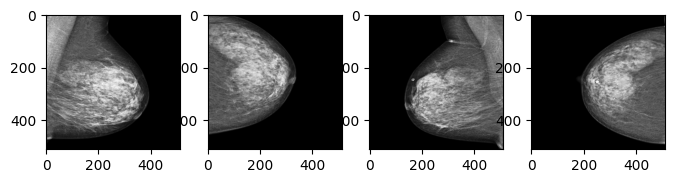

In [ ]:
fig = plt.figure(figsize=(8, 8))
rows = 4
columns = 4

for i in range(1, len(test_df)+1):
  path = str(test_df.loc[i-1, 'image_id'])+".dcm"
  img = pydicom.dcmread(path)
  image = img.pixel_array
  image = cv2.resize(image, (512, 512))
  image = (image/255).astype(np.float32)
  input = np.expand_dims(image, axis=-1)
  input = np.expand_dims(input, axis=0)
  print(input.shape)
  fig.add_subplot(rows, columns, i)
  plt.imshow(image, cmap="Greys_r")
  print(path, 'prediction:', model.predict(input))
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()